In [1]:
import numpy as np

In [2]:
major_folder_path_1 = '/content/drive/MyDrive/NYUAD-Courses/Deep Learning/Project/Data/San Bernardino - 6 - story Hotel/Files Extracted Filtered Moded 003'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
class FileData:
  def __init__(self,name,acc_index,vel_index,dsp_index,lst_index,dt_acc,dt_vel,dt_dsp,unit_acc,unit_vel,unit_dsp,acc_values,vel_values,dsp_values,dt_sampling,acc_values_sampled,vel_values_sampled,dsp_values_sampled):
    self.name = name
    self.acc_index = acc_index
    self.vel_index = vel_index
    self.dsp_index = dsp_index
    self.lst_index = lst_index
    self.dt_acc = dt_acc
    self.dt_vel = dt_vel
    self.dt_dsp = dt_dsp
    self.unit_acc = unit_acc
    self.unit_vel = unit_vel
    self.unit_dsp = unit_dsp
    self.acc_values = acc_values
    self.vel_values = vel_values
    self.dsp_values = dsp_values
    self.dt_sampling = dt_sampling
    self.acc_values_sampled = acc_values_sampled
    self.vel_values_sampled = vel_values_sampled
    self.dsp_values_sampled = dsp_values_sampled
    self.ID = 0
    self.u_r = None
    self.ud_r = None
    self.udd_r = None
    self.t = None # time vector

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(y,title):
  plt.rcParams["figure.figsize"] = [15, 3.50]
  plt.rcParams["figure.autolayout"] = True
  plt.title(title)
  plt.plot(y, color="red")
  plt.show()

In [6]:
import pickle
import numpy as np

def save_object_with_pickle(file_path,file_name,data):
    with open(f'{file_path}/{file_name}.pickle', 'wb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)


def load_object_with_pickle(file_path,file_name):
    with open(f'{file_path}/{file_name}.pickle', 'rb') as f:
        data = pickle.load(f)
        return data

In [7]:
EQs_data = load_object_with_pickle(major_folder_path_1,'all_eq_processed_data_ID_m_SDOF_nonlinear_v003')

In [8]:
# Earth quakes summary
print(f'ID :: Acceleration Units, Velocity Units, Displacement Units, Maximum Absolute Acceleration # No of timesteps(stations)')
for EQ in EQs_data:
  print(f'{EQ.ID:2.0F} ::        {EQ.unit_acc}     ,      {EQ.unit_vel}    ,          {EQ.unit_dsp}        ,           {np.absolute(EQ.acc_values_sampled).max():6.3F}              #    {EQ.acc_values_sampled.shape[0]:7.0F}')


ID :: Acceleration Units, Velocity Units, Displacement Units, Maximum Absolute Acceleration # No of timesteps(stations)
 1 ::        m/sec2     ,      m/sec    ,          m        ,            0.063              #      12401
 2 ::        m/sec2     ,      m/sec    ,          m        ,            0.286              #      12001
 3 ::        m/sec2     ,      m/sec    ,          m        ,            0.046              #      11201
 4 ::        m/sec2     ,      m/sec    ,          m        ,            0.221              #      14399
 5 ::        m/sec2     ,      m/sec    ,          m        ,            0.052              #      11201
 6 ::        m/sec2     ,      m/sec    ,          m        ,            0.196              #      17199
 7 ::        m/sec2     ,      m/sec    ,          m        ,            0.109              #      12001
 8 ::        m/sec2     ,      m/sec    ,          m        ,            0.367              #      16399
 9 ::        m/sec2     ,      m/sec    

Inspecting One EQ Input & Output for aa single degree of freedom structure (building with one floor, solved for one direction). Our database has EQ records in East/West direction. Each EQ record has EQ accelration, velocity, displacement. For solving a structural response, we need only EQ accelration record as input and for each floor we get three records: acceleration, velocity, and displacement.

We can start with simple model for regression between (Input  Acceleration) and (Output Acceleration).
Each EQ has different length. I guess we will have to trim them all to have one length. OR append zeros to inputs to make them all have the same length, then rerun the analysis. Let me know your thoughts.

Time increment between timesteps is 0.005 sec.

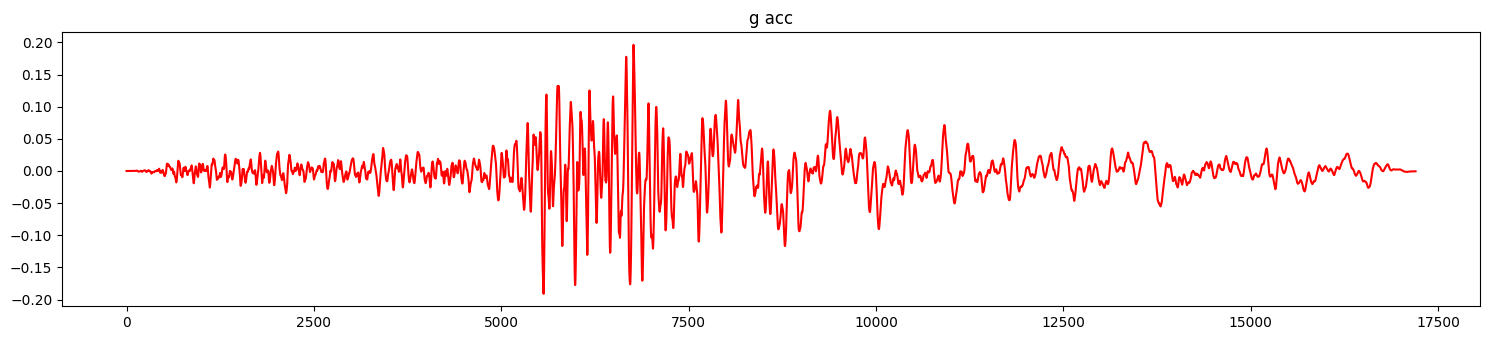

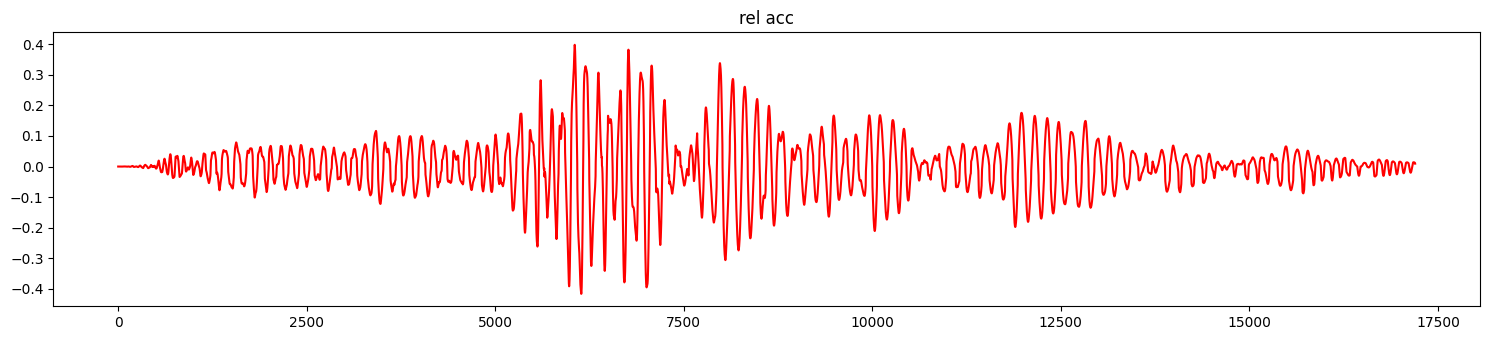

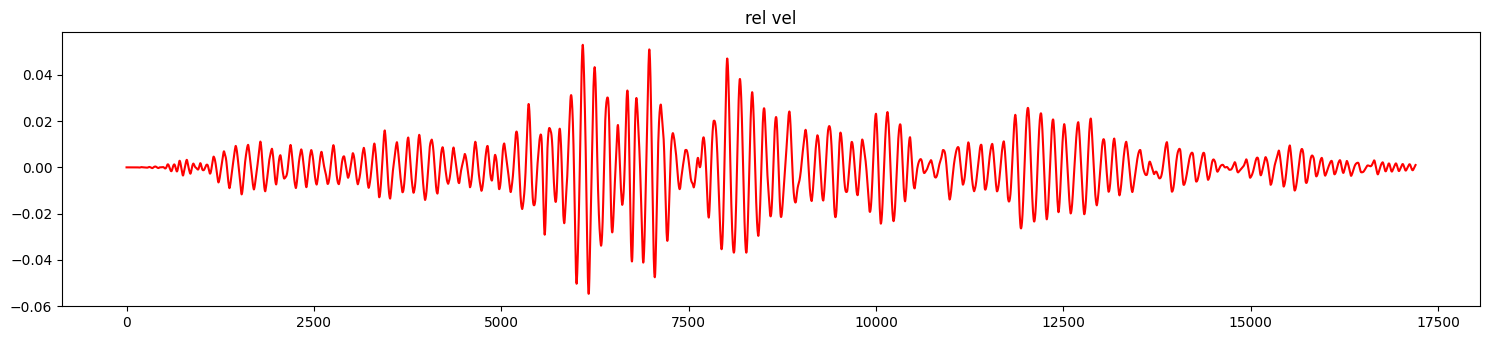

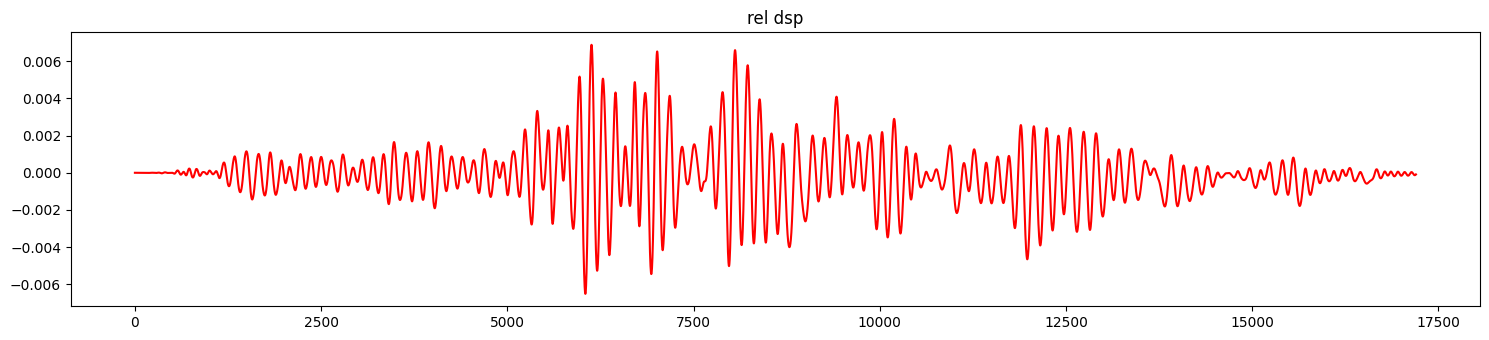

In [9]:
ii=5
plot_series(EQs_data[ii].acc_values_sampled,'g acc') ## Input  Ground Acceleration  m/sec2
plot_series(EQs_data[ii].udd_r,'rel acc')            ## Output Relative Acceleration  m/sec2 (Main Output)
plot_series(EQs_data[ii].ud_r ,'rel vel')            ## Output Relative Velocity      m/s    (Secondary Output)
plot_series(EQs_data[ii].u_r  ,'rel dsp')            ## Output Relative Displacement  m      (Secondary Output)

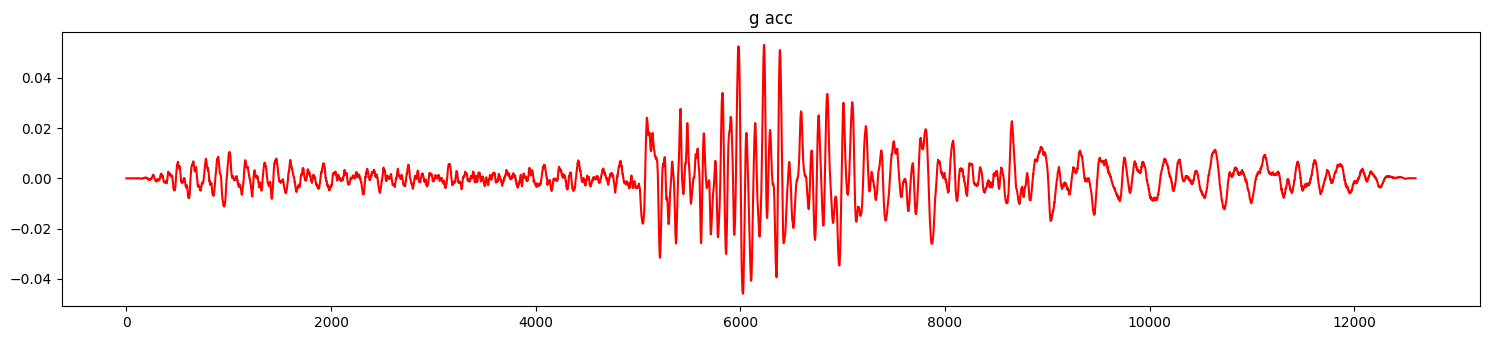

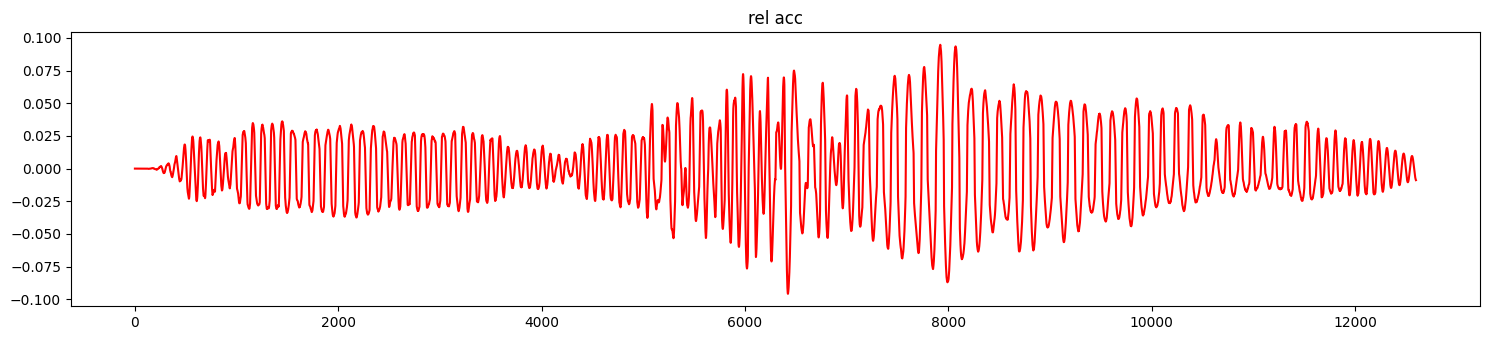

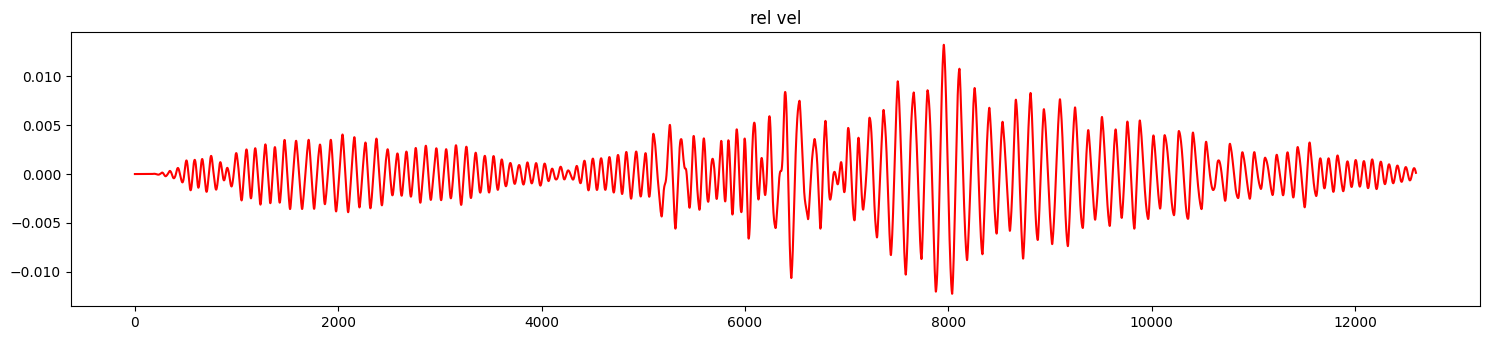

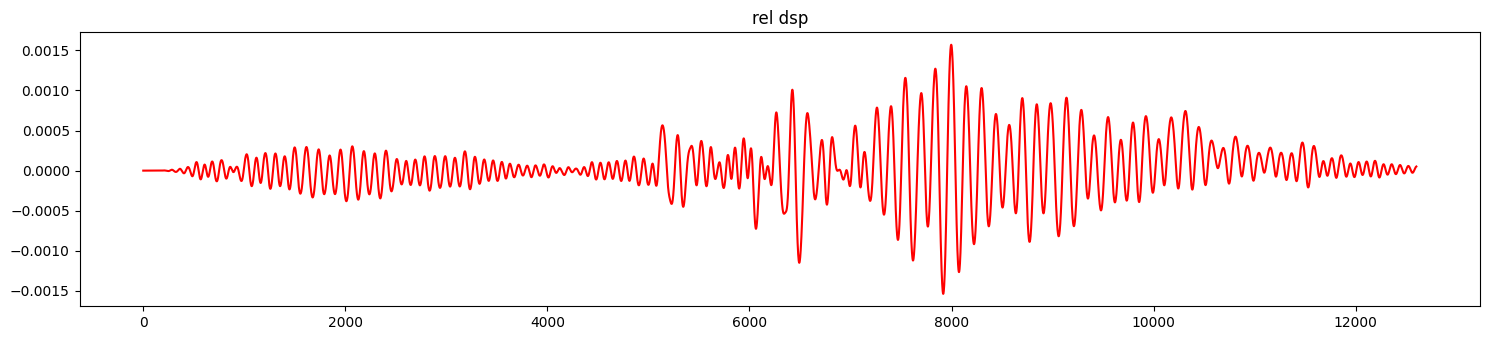

In [10]:
ii=13
plot_series(EQs_data[ii].acc_values_sampled,'g acc') ## Input  Ground Acceleration  m/sec2
plot_series(EQs_data[ii].udd_r,'rel acc')            ## Output Relative Acceleration  m/sec2 (Main Output)
plot_series(EQs_data[ii].ud_r ,'rel vel')            ## Output Relative Velocity      m/s    (Secondary Output)
plot_series(EQs_data[ii].u_r  ,'rel dsp')            ## Output Relative Displacement  m      (Secondary Output)